In [1]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [51]:
from pandas.tools.plotting import table
import numpy as np

In [52]:
%matplotlib inline

In [2]:
df = pd.read_csv("sentiment_800k.csv")

In [3]:
df.head()

,article_id,article_title,author,board,content,date,ip,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push,url,setiment,sentiment
0,M.1539525172.A.F95,[問卦] 有沒有手毛很多的男人的八卦？,d8888872002 (中壢唐嫣),Gossiping,小妹最近看到一個男的 全身毛很多 手指頭毛整個炸出來 手臂的毛多到可以垂下來 反正就是整個人...,Sun Oct 14 21:52:46 2018,180.217.162.64,16.0,3.0,7.0,3.0,10.0,https://www.ptt.cc/bbs/Gossiping/M.1539525172....,0,-0.3
1,M.1539226357.A.8E7,[新聞] 台股早盤大跌500點 陳美伶：台灣經濟基,Desire5566 (滴塞ㄦ),Gossiping,台股早盤大跌500點 陳美伶：台灣經濟基本面穩健 記者吳佳穎台北報導IMF日前下修全球經濟成...,Thu Oct 11 10:52:33 2018,223.136.69.125,29.0,3.0,12.0,11.0,15.0,https://www.ptt.cc/bbs/Gossiping/M.1539226357....,0,0.2
2,M.1541524782.A.8E7,Re: [問卦] 博恩夜夜秀笑的出來嗎？,potter1529 (宋代才女唱元曲),Gossiping,: 這個節目名字近期一直在批踢踢上看到 : 但還是不想點進去看只有看討論文 : 很好奇的是 ...,Wed Nov 7 01:19:39 2018,1.160.127.30,44.0,2.0,8.0,32.0,10.0,https://www.ptt.cc/bbs/Gossiping/M.1541524782....,0,0.0
3,M.1540481077.A.839,Re: [新聞] 普悠瑪延誤66分 乘客：快被氣死！,xanthippe (只有慚愧),Gossiping,: 不是氣死，就是...沒事~~ : https://attach.setn.com/new...,Thu Oct 25 23:24:33 2018,140.130.169.253,3.0,0.0,1.0,2.0,1.0,https://www.ptt.cc/bbs/Gossiping/M.1540481077....,0,-0.3
4,M.1543153445.A.DFD,[爆卦] 萌萌要組黨了,xamous (一天死去一點),Gossiping,反同公投大獲全勝，基督教團體宣布組黨。將推八十位立委候選人，目標超越1/2席次。 中國台北政...,Sun Nov 25 21:44:02 2018,27.246.106.118,407.0,76.0,89.0,166.0,165.0,https://www.ptt.cc/bbs/Gossiping/M.1543153445....,0,0.6


In [5]:
lst = ['韓國瑜', '柯', '中國', '其邁', '高雄', '蔡', '丁', '民進黨', '九二', 
       '台北', '肥宅', '網友', '姚', '國民黨', '日本', '美國', '台灣', '正妹']

# def topic(string, row):
#     if string in str(row['article_title']):
#         dftemp.append(row)

count = 0
while count < len(lst):
    
    for keyword in lst:
        dftemp = pd.DataFrame()
        for i in range(len(df)):
            if keyword in df.iloc[i,:]['article_title']: #dfj
#                 print(keyword)
#                 print(dfj.iloc[i,:])
                dftemp = dftemp.append(df.iloc[i,:])
#                 print(dftemp)
#         print(dftemp)
        locals()['dftemp%s'%count] = dftemp
        count += 1
#理論上輸出會有dftemp0~17

In [7]:
dftemp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 32 to 79979
Data columns (total 15 columns):
article_id               2340 non-null object
article_title            2340 non-null object
author                   2340 non-null object
board                    2340 non-null object
content                  2340 non-null object
date                     2340 non-null object
ip                       2340 non-null object
message_count.all        2340 non-null float64
message_count.boo        2340 non-null float64
message_count.count      2340 non-null float64
message_count.neutral    2340 non-null float64
message_count.push       2340 non-null float64
sentiment                2340 non-null float64
setiment                 2340 non-null float64
url                      2340 non-null object
dtypes: float64(7), object(8)
memory usage: 219.4+ KB


In [15]:
print(dftemp0['message_count.all'].describe())
print(dftemp0['message_count.boo'].describe())
print(dftemp0['message_count.push'].describe())
print(dftemp0['sentiment'].describe())

count    2340.000000
mean       79.729915
std       151.248453
min         0.000000
25%        15.000000
50%        31.000000
75%        69.000000
max      1481.000000
Name: message_count.all, dtype: float64
count    2340.000000
mean       13.947009
std        29.184435
min         0.000000
25%         1.000000
50%         5.000000
75%        12.250000
max       388.000000
Name: message_count.boo, dtype: float64
count    2340.000000
mean       32.609402
std        73.558831
min         0.000000
25%         5.000000
50%         9.500000
75%        22.000000
max       760.000000
Name: message_count.push, dtype: float64
count    2340.000000
mean       -0.061410
std         0.313065
min        -0.900000
25%        -0.200000
50%         0.000000
75%         0.100000
max         0.900000
Name: sentiment, dtype: float64


In [16]:
print(dftemp1['message_count.all'].describe())
print(dftemp1['message_count.boo'].describe())
print(dftemp1['message_count.push'].describe())
print(dftemp1['sentiment'].describe())

count    4262.000000
mean       84.995073
std       157.373243
min         0.000000
25%        15.000000
50%        33.000000
75%        78.000000
max      1497.000000
Name: message_count.all, dtype: float64
count    4262.000000
mean       13.765134
std        32.586001
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       595.000000
Name: message_count.boo, dtype: float64
count    4262.000000
mean       35.777569
std        90.341911
min         0.000000
25%         4.000000
50%         9.000000
75%        22.000000
max      1349.000000
Name: message_count.push, dtype: float64
count    4262.000000
mean       -0.129939
std         0.300723
min        -0.900000
25%        -0.300000
50%        -0.100000
75%         0.000000
max         0.900000
Name: sentiment, dtype: float64


In [17]:
print(dftemp2['message_count.all'].describe())
print(dftemp2['message_count.boo'].describe())
print(dftemp2['message_count.push'].describe())
print(dftemp2['sentiment'].describe())

count    2855.000000
mean       49.505779
std       102.982278
min         0.000000
25%        11.000000
50%        21.000000
75%        45.000000
max      1370.000000
Name: message_count.all, dtype: float64
count    2855.000000
mean        6.040280
std        16.193625
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       338.000000
Name: message_count.boo, dtype: float64
count    2855.000000
mean       22.946760
std        59.905227
min         0.000000
25%         4.000000
50%         7.000000
75%        17.000000
max       799.000000
Name: message_count.push, dtype: float64
count    2855.000000
mean       -0.125079
std         0.334589
min        -0.900000
25%        -0.300000
50%        -0.100000
75%         0.100000
max         0.900000
Name: sentiment, dtype: float64


In [18]:
print(dftemp3['message_count.all'].describe())
print(dftemp3['message_count.boo'].describe())
print(dftemp3['message_count.push'].describe())
print(dftemp3['sentiment'].describe())

count     862.000000
mean       81.089327
std       138.899617
min         0.000000
25%        17.000000
50%        34.000000
75%        76.000000
max      1250.000000
Name: message_count.all, dtype: float64
count    862.000000
mean      12.744780
std       22.847316
min        0.000000
25%        1.000000
50%        4.000000
75%       13.000000
max      203.000000
Name: message_count.boo, dtype: float64
count    862.000000
mean      35.599768
std       76.973372
min        0.000000
25%        5.000000
50%       11.000000
75%       28.000000
max      788.000000
Name: message_count.push, dtype: float64
count    862.000000
mean      -0.016241
std        0.346129
min       -0.900000
25%       -0.200000
50%        0.000000
75%        0.200000
max        0.900000
Name: sentiment, dtype: float64


In [19]:
print(dftemp4['message_count.all'].describe())
print(dftemp4['message_count.boo'].describe())
print(dftemp4['message_count.push'].describe())
print(dftemp4['sentiment'].describe())

count    1978.000000
mean       51.586451
std       107.082475
min         0.000000
25%        12.000000
50%        23.000000
75%        50.000000
max      1458.000000
Name: message_count.all, dtype: float64
count    1978.000000
mean        8.520728
std        18.515215
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       269.000000
Name: message_count.boo, dtype: float64
count    1978.000000
mean       21.196158
std        53.617814
min         0.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       675.000000
Name: message_count.push, dtype: float64
count    1978.000000
mean       -0.068453
std         0.356805
min        -0.900000
25%        -0.300000
50%         0.000000
75%         0.100000
max         0.900000
Name: sentiment, dtype: float64


In [20]:
print(dftemp5['message_count.all'].describe())
print(dftemp5['message_count.boo'].describe())
print(dftemp5['message_count.push'].describe())
print(dftemp5['sentiment'].describe())

count    1278.000000
mean       77.434272
std       168.883890
min         0.000000
25%        13.000000
50%        27.000000
75%        65.000000
max      1495.000000
Name: message_count.all, dtype: float64
count    1278.000000
mean       15.187793
std        38.122160
min         0.000000
25%         1.000000
50%         4.000000
75%        14.000000
max       595.000000
Name: message_count.boo, dtype: float64
count    1278.000000
mean       31.487480
std        92.283412
min         0.000000
25%         4.000000
50%         8.000000
75%        18.000000
max      1121.000000
Name: message_count.push, dtype: float64
count    1278.000000
mean       -0.079577
std         0.334890
min        -0.900000
25%        -0.300000
50%         0.000000
75%         0.100000
max         0.900000
Name: sentiment, dtype: float64


In [21]:
print(dftemp6['message_count.all'].describe())
print(dftemp6['message_count.boo'].describe())
print(dftemp6['message_count.push'].describe())
print(dftemp6['sentiment'].describe())

count    1032.00000
mean       69.13469
std       145.71984
min         0.00000
25%        11.00000
50%        24.00000
75%        63.25000
max      1497.00000
Name: message_count.all, dtype: float64
count    1032.000000
mean       11.526163
std        28.052972
min         0.000000
25%         0.000000
50%         2.000000
75%        12.000000
max       379.000000
Name: message_count.boo, dtype: float64
count    1032.000000
mean       32.939922
std       103.736246
min         0.000000
25%         4.000000
50%         8.000000
75%        19.000000
max      1365.000000
Name: message_count.push, dtype: float64
count    1032.000000
mean       -0.107461
std         0.326687
min        -0.900000
25%        -0.300000
50%        -0.100000
75%         0.000000
max         0.900000
Name: sentiment, dtype: float64


In [22]:
print(dftemp7['message_count.all'].describe())
print(dftemp7['message_count.boo'].describe())
print(dftemp7['message_count.push'].describe())
print(dftemp7['sentiment'].describe())

count     744.000000
mean       73.267473
std       135.830132
min         0.000000
25%        14.000000
50%        27.000000
75%        61.000000
max      1034.000000
Name: message_count.all, dtype: float64
count    744.000000
mean      11.090054
std       25.035398
min        0.000000
25%        1.000000
50%        4.000000
75%       10.000000
max      341.000000
Name: message_count.boo, dtype: float64
count    744.000000
mean      30.655914
std       70.913458
min        0.000000
25%        4.000000
50%        9.000000
75%       18.000000
max      711.000000
Name: message_count.push, dtype: float64
count    744.000000
mean      -0.122581
std        0.311685
min       -0.900000
25%       -0.300000
50%       -0.100000
75%        0.000000
max        0.900000
Name: sentiment, dtype: float64


In [24]:
print(dftemp8['message_count.all'].describe())
print(dftemp8['message_count.boo'].describe())
print(dftemp8['message_count.push'].describe())
print(dftemp8['sentiment'].describe())

count     376.000000
mean       76.968085
std       150.936275
min         0.000000
25%        11.000000
50%        28.000000
75%        77.000000
max      1495.000000
Name: message_count.all, dtype: float64
count    376.000000
mean      17.170213
std       51.577129
min        0.000000
25%        1.000000
50%        4.000000
75%       14.000000
max      595.000000
Name: message_count.boo, dtype: float64
count    376.000000
mean      27.023936
std       67.111942
min        0.000000
25%        4.000000
50%        7.000000
75%       20.000000
max      640.000000
Name: message_count.push, dtype: float64
count    376.000000
mean      -0.149202
std        0.323892
min       -0.900000
25%       -0.300000
50%       -0.100000
75%        0.000000
max        0.800000
Name: sentiment, dtype: float64


In [25]:
print(dftemp9['message_count.all'].describe())
print(dftemp9['message_count.boo'].describe())
print(dftemp9['message_count.push'].describe())
print(dftemp9['sentiment'].describe())

count    1212.000000
mean       52.594059
std       109.483225
min         0.000000
25%        11.000000
50%        20.000000
75%        44.250000
max      1496.000000
Name: message_count.all, dtype: float64
count    1212.000000
mean        6.405116
std        20.601887
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       341.000000
Name: message_count.boo, dtype: float64
count    1212.000000
mean       24.307756
std        62.225425
min         0.000000
25%         4.000000
50%         7.000000
75%        16.250000
max       793.000000
Name: message_count.push, dtype: float64
count    1212.000000
mean       -0.109323
std         0.378908
min        -0.900000
25%        -0.400000
50%        -0.100000
75%         0.100000
max         0.900000
Name: sentiment, dtype: float64


In [30]:
print(dftemp10['message_count.all'].describe())
print(dftemp10['message_count.boo'].describe())
print(dftemp10['message_count.push'].describe())
print(dftemp10['sentiment'].describe())

count    802.000000
mean      11.613466
std        6.996894
min        0.000000
25%        7.000000
50%       10.000000
75%       15.000000
max       60.000000
Name: message_count.all, dtype: float64
count    802.000000
mean       2.356608
std        2.336811
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       16.000000
Name: message_count.boo, dtype: float64
count    802.000000
mean       3.765586
std        3.589750
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       29.000000
Name: message_count.push, dtype: float64
count    802.000000
mean      -0.008479
std        0.427112
min       -0.900000
25%       -0.300000
50%        0.000000
75%        0.300000
max        0.900000
Name: sentiment, dtype: float64


In [28]:
print(dftemp11['message_count.all'].describe())
print(dftemp11['message_count.boo'].describe())
print(dftemp11['message_count.push'].describe())
print(dftemp11['sentiment'].describe())

count    600.000000
mean      67.001667
std      118.983038
min        1.000000
25%       12.000000
50%       26.000000
75%       61.250000
max      769.000000
Name: message_count.all, dtype: float64
count    600.000000
mean       9.170000
std       15.416134
min        0.000000
25%        1.000000
50%        4.000000
75%       10.000000
max      109.000000
Name: message_count.boo, dtype: float64
count    600.000000
mean      32.236667
std       70.386726
min        0.000000
25%        4.000000
50%        9.000000
75%       24.000000
max      546.000000
Name: message_count.push, dtype: float64
count    600.000000
mean      -0.109333
std        0.282156
min       -0.900000
25%       -0.300000
50%       -0.100000
75%        0.000000
max        0.800000
Name: sentiment, dtype: float64


In [36]:
print(dftemp0['message_count.all'].mean())
print(dftemp0['message_count.push'].mean())
print(dftemp0['message_count.boo'].mean())

print(dftemp0['message_count.all'].median())
print(dftemp0['message_count.push'].median())
print(dftemp0['message_count.boo'].median())

print(dftemp0['sentiment'].mean())
print(dftemp0['sentiment'].median())

print(len(dftemp0[dftemp0['sentiment']>0]))
print(len(dftemp0[dftemp0['sentiment']<0]))

79.72991452991452
32.60940170940171
13.947008547008547
31.0
9.5
5.0
-0.06141025694007547
0.0
745
1042


In [49]:
summary = pd.DataFrame()
for i in range(18):
    t = {'mc_all_mean': locals()["dftemp%s"%i]['message_count.all'].mean(),
         'mc_push_mean': locals()["dftemp%s"%i]['message_count.push'].mean(),
         'mc_boo_mean': locals()["dftemp%s"%i]['message_count.boo'].mean(),
         'mc_all_med': locals()["dftemp%s"%i]['message_count.all'].median(),
         'mc_push_med': locals()["dftemp%s"%i]['message_count.push'].median(),
         'mc_boo_med': locals()["dftemp%s"%i]['message_count.boo'].median(),
         'senti_mean': locals()["dftemp%s"%i]['sentiment'].mean(),
         'senti_median': locals()["dftemp%s"%i]['sentiment'].median(),
         'positive_count': len(locals()["dftemp%s"%i][locals()["dftemp%s"%i]['sentiment']>0]),
         'negative_count': len(locals()["dftemp%s"%i][locals()["dftemp%s"%i]['sentiment']<0]) }
#     print(t)
    add = pd.DataFrame(t, index=[i])
    summary = summary.append(add)

In [89]:
summary

,mc_all_mean,mc_push_mean,mc_boo_mean,mc_all_med,mc_push_med,mc_boo_med,senti_mean,senti_median,positive_count,negative_count
0,79.729915,32.609402,13.947009,31.0,9.5,5.0,-0.061410,0.0,745,1042
1,84.995073,35.777569,13.765134,33.0,9.0,4.0,-0.129939,-0.1,866,2333
2,49.505779,22.946760,6.040280,21.0,7.0,2.0,-0.125079,-0.1,746,1532
3,81.089327,35.599768,12.744780,34.0,11.0,4.0,-0.016241,0.0,340,328
4,51.586451,21.196158,8.520728,23.0,8.0,3.0,-0.068453,0.0,645,899
5,77.434272,31.487480,15.187793,27.0,8.0,4.0,-0.079577,0.0,377,608
6,69.134690,32.939922,11.526163,24.0,8.0,2.0,-0.107461,-0.1,256,537
7,73.267473,30.655914,11.090054,27.0,9.0,4.0,-0.122581,-0.1,156,395
8,76.968085,27.023936,17.170213,28.0,7.0,4.0,-0.149202,-0.1,76,221
9,52.594059,24.307756,6.405116,20.0,7.0,2.0,-0.109323,-0.1,352,624


d:\python3.6\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  if __name__ == '__main__':


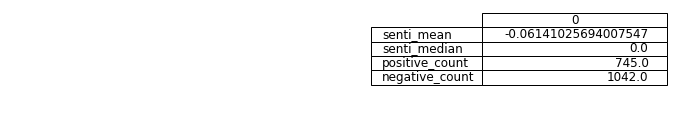

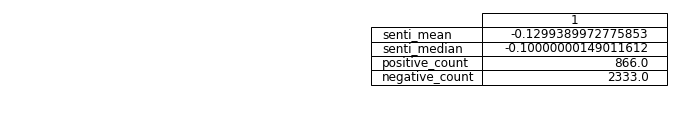

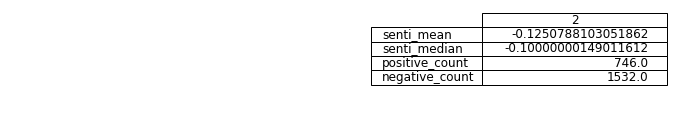

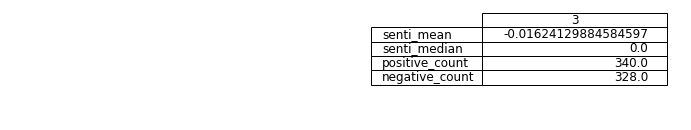

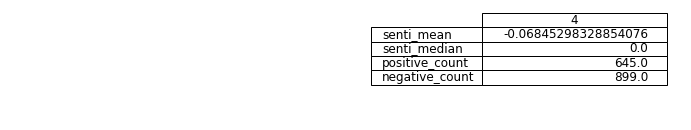

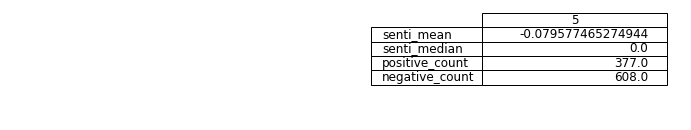

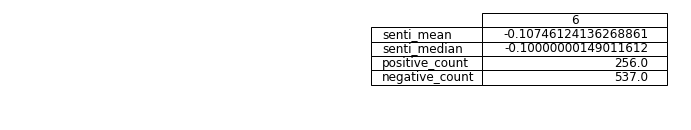

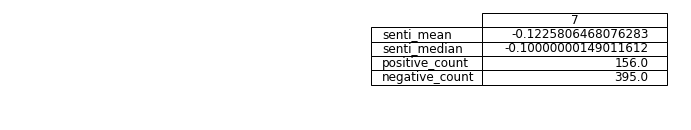

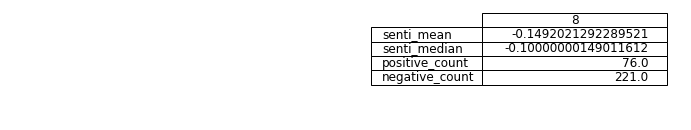

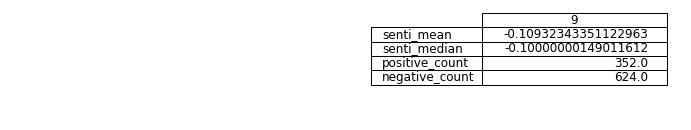

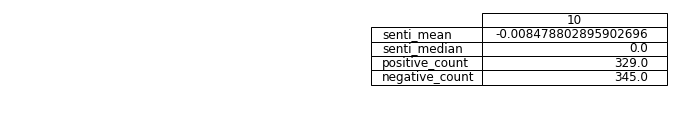

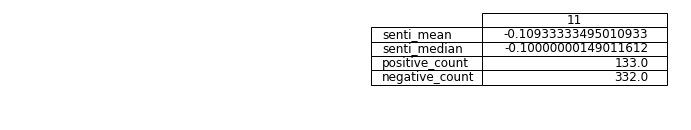

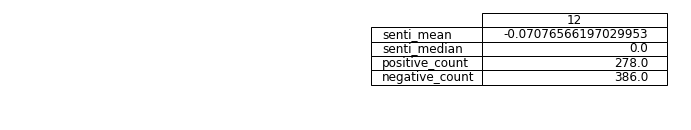

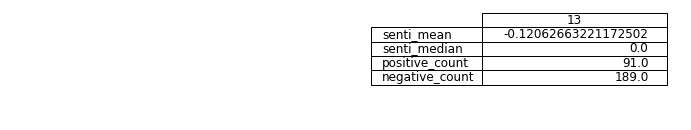

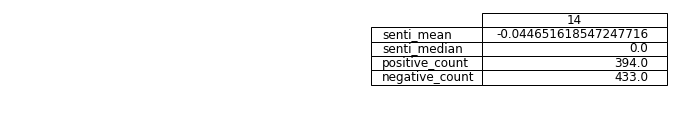

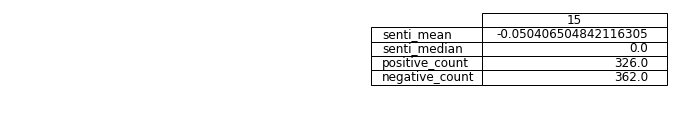

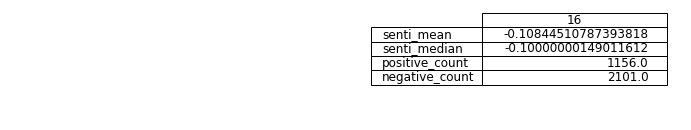

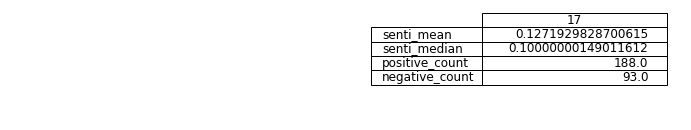

In [60]:
for j in range(18):
    dfdraw = summary.iloc[j, 6:].T
# print(dfdraw)

    fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
    tabla = table(ax, dfdraw, loc='upper right', colWidths=[0.23]*len(dfdraw))  # where dfdraw is your data frame
    tabla.auto_set_font_size(False) # Activate set fontsize manually
    tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
    tabla.scale(1.2, 1.2) # change size table
    plt.savefig('table' + str(j) + '.png', transparent=True)

In [92]:
for l in range(18):

    dfdraw1 = summary.iloc[l, [0, 3, 1, 4, 2, 5]]
    print(dfdraw1)
    dfdraw1.plot.bar(figsize = (10, 5), rot = 1)

    plt.savefig('bar' + str(l) + '.png', transparent=True)
    plt.close()

mc_all_mean     79.729915
mc_all_med      31.000000
mc_push_mean    32.609402
mc_push_med      9.500000
mc_boo_mean     13.947009
mc_boo_med       5.000000
Name: 0, dtype: float64
mc_all_mean     84.995073
mc_all_med      33.000000
mc_push_mean    35.777569
mc_push_med      9.000000
mc_boo_mean     13.765134
mc_boo_med       4.000000
Name: 1, dtype: float64
mc_all_mean     49.505779
mc_all_med      21.000000
mc_push_mean    22.946760
mc_push_med      7.000000
mc_boo_mean      6.040280
mc_boo_med       2.000000
Name: 2, dtype: float64
mc_all_mean     81.089327
mc_all_med      34.000000
mc_push_mean    35.599768
mc_push_med     11.000000
mc_boo_mean     12.744780
mc_boo_med       4.000000
Name: 3, dtype: float64
mc_all_mean     51.586451
mc_all_med      23.000000
mc_push_mean    21.196158
mc_push_med      8.000000
mc_boo_mean      8.520728
mc_boo_med       3.000000
Name: 4, dtype: float64
mc_all_mean     77.434272
mc_all_med      27.000000
mc_push_mean    31.487480
mc_push_med      8.000